##### Canopy height models (CHM) are a measurement of the height of trees, buildings, and other structures above the ground topography. ... A canopy height model is calculated by subtracting the digital terrain model (DTM) from the digital surface model (DSM)

In [1]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib as plt
from rasterio.plot import show
import pandas as pd
import georasters as gr
import geopandas as gpd
from matplotlib import pyplot as plt

#### DSM

In [10]:
ds = gdal.Open('Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')
fp = r'Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
DSM_img = rasterio.open(fp)
raster_array_DSM = DSM_img.read(1)
raster_array_DSM

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

#### DTM

In [11]:
fp_DTM = r'Data/DTM/DTM-1/GeoTIFF/DHMVIIDTMRAS1m_k01.tif'
DTM_img = rasterio.open(fp_DTM)
raster_array_DTM = DTM_img.read(1)
raster_array_DTM

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.693e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,  1.688e+01,
         1.690e+01]], dtype=float32)

#### CHM

In [13]:
raster_array_CHM = raster_array_DSM - raster_array_DTM
raster_array_CHM

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02000046],
       [0.        , 0.        , 0.        , ..., 0.01000023, 0.        ,
        0.01000023]], dtype=float32)

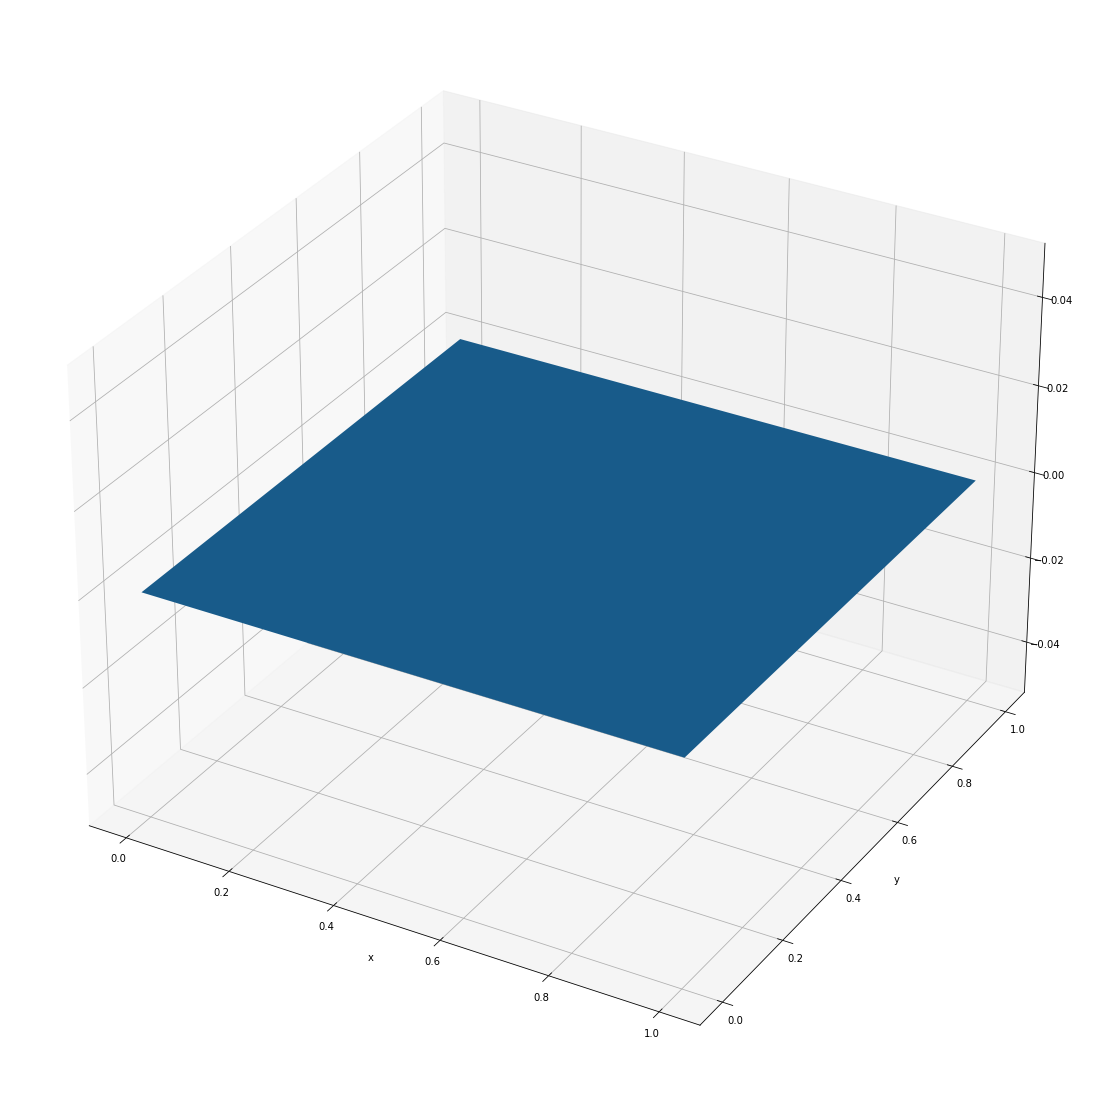

In [14]:
image = raster_array_CHM[0:2,0:2]
nx = image.shape[1]
ny = image.shape[0]

x = range(nx)
y = range(ny)

X,Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(20, 20))
ha = hf.add_subplot(111, projection="3d")
ha.plot_surface(X,Y, image)
ha.set_zlim = (0, 50)
plt.xlabel("x")
plt.ylabel("y")
plt.show()